In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [2]:
#cfg = load_config("../configs/task2_2_iter5.py")
logs = [tops.logger.read_logs(pathlib.Path("../outputs/task2_2_iter0")), 
        tops.logger.read_logs(pathlib.Path("../outputs/task2_2_iter5"))]

In [3]:
# The log is formatted as a list of dictionaries
print(logs[0][:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 2.8988845348358154, 'loss/classification_loss': 9.245205879211426, 'loss/total_loss': 12.14409065246582, 'global_step': 0}, {'amp/grad_scale': 16384.0, 'global_step': 1}, {'stats/learning_rate': 0.000509, 'global_step': 2}, {'stats/learning_rate': 0.000518, 'global_step': 3}, {'stats/learning_rate': 0.000527, 'global_step': 4}, {'stats/learning_rate': 0.000536, 'global_step': 5}, {'stats/learning_rate': 0.000545, 'global_step': 6}, {'stats/learning_rate': 0.000554, 'global_step': 7}, {'stats/learning_rate': 0.000563, 'global_step': 8}]


In [7]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = []
mAP_entries = []
for log in logs:
    loss_entries.append([entry for entry in log if "loss/total_loss" in entry])
    mAP_entries.append([entry for entry in log if "metrics/mAP" in entry])

In [5]:
LOSS = False

Text(0.5, 0, 'Global step (number of batches trained on)')

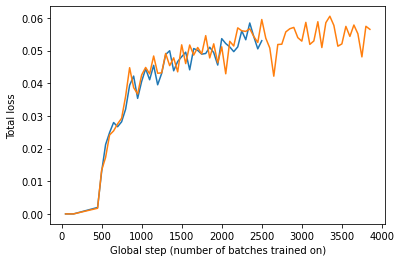

In [9]:
if LOSS:
    for loss_entry in loss_entries:
        plt.plot([entry["global_step"] for entry in loss_entry], [entry["loss/total_loss"] for entry in loss_entry])
else:
    for mAP_entry in mAP_entries:
        plt.plot([entry["global_step"] for entry in mAP_entry], [entry["metrics/mAP"] for entry in mAP_entry])

plt.ylabel("Total loss")
plt.xlabel("Global step (number of batches trained on)")